# Predicting Seattle (King County) Housing Prices

In [17]:
'''
Build/deploy linear regression using over 20,000 houses in the Greater Seattle Area.

Data downloaded from https://www.kaggle.com/harlfoxem/housesalesprediction

'''

import pandas as pd
import matplotlib.pyplot as plt
king = pd.read_csv('https://raw.githubusercontent.com/pizacd/King-County-Housing-Prices/master/kc_house_data.csv')

In [18]:
king = king.drop('id',axis = 1)
king.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12686,20141124T000000,260000.0,4,1.75,1830,5375,1.0,0,0,2,7,1060,770,1962,0,98198,47.4169,-122.316,1040,7500
8377,20140806T000000,404500.0,2,1.00,800,5080,1.0,0,0,3,7,800,0,1938,0,98115,47.6978,-122.314,1560,5110
19542,20140519T000000,530000.0,3,3.50,2320,3174,2.0,0,0,3,9,2060,260,1997,0,98033,47.6897,-122.175,2320,3187
15070,20141211T000000,430000.0,8,3.25,4300,10441,2.0,0,0,4,8,2800,1500,1979,0,98059,47.4786,-122.131,1780,10457
2205,20140509T000000,604000.0,4,2.50,2260,7753,2.0,0,0,3,9,2260,0,1989,0,98029,47.5752,-121.995,2690,8924
19792,20141110T000000,385000.0,3,3.50,1370,1540,2.0,0,0,3,8,1100,270,2006,0,98116,47.5638,-122.388,1370,915
18058,20141218T000000,244000.0,2,1.00,1180,10200,1.0,0,0,4,7,1180,0,1955,0,98148,47.4358,-122.336,1330,10200
21468,20150508T000000,649500.0,4,3.00,3150,6599,2.0,0,0,3,9,3150,0,2008,0,98056,47.5279,-122.199,2680,9430
6155,20150123T000000,239975.0,3,2.50,1820,7242,1.0,0,0,3,7,1220,600,1959,0,98188,47.4318,-122.292,1350,8214
5428,20150127T000000,680000.0,4,2.75,2720,54048,2.0,0,0,3,8,2720,0,1985,0,98072,47.7181,-122.089,2580,37721


## Replacing houses never renovated with renovation year as the built year

In [19]:
no_reno = king.loc[king.yr_renovated ==0].copy()
no_reno.yr_renovated = no_reno.yr_built
king.yr_renovated = king.yr_renovated.replace(0,no_reno.yr_renovated)
king.date = pd.to_datetime(king.date)
king.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
171,2015-01-02,272000.0,3,1.75,2160,7140,1.0,0,0,4,7,1670,490,1978,1978,98023,47.3026,-122.374,1930,7350
16671,2014-11-10,300000.0,5,1.75,2110,8500,1.0,0,0,3,7,1100,1010,1962,1962,98133,47.7737,-122.350,2020,8500
6024,2015-04-20,635000.0,5,2.75,3110,6621,2.0,0,0,3,9,3110,0,2006,2006,98065,47.5430,-121.888,3550,7953
16853,2014-08-28,546800.0,4,2.25,2170,10000,1.0,0,0,3,8,1420,750,1975,1975,98008,47.6219,-122.109,2390,11000
21316,2015-03-10,1698000.0,4,3.50,3950,6240,2.0,0,0,3,11,3950,0,2015,2015,98112,47.6221,-122.290,2040,6240
18768,2014-07-02,2147500.0,3,3.50,4660,5500,2.0,0,4,5,10,3040,1620,1909,1909,98102,47.6465,-122.319,2980,5500
2646,2014-07-17,656000.0,3,1.75,1480,7475,1.5,0,0,3,8,1480,0,1943,1943,98115,47.6732,-122.272,2120,7216
18368,2015-03-03,500000.0,3,1.00,940,10360,1.0,0,0,4,7,940,0,1964,1964,98033,47.6880,-122.190,2019,10360
20142,2014-06-05,550000.0,4,2.50,2700,5150,2.0,0,0,3,9,2700,0,2007,2007,98059,47.5071,-122.148,3160,7620
16293,2015-05-04,672500.0,3,1.75,1580,5750,1.0,0,2,4,8,1330,250,1947,1947,98199,47.6339,-122.392,2480,5750


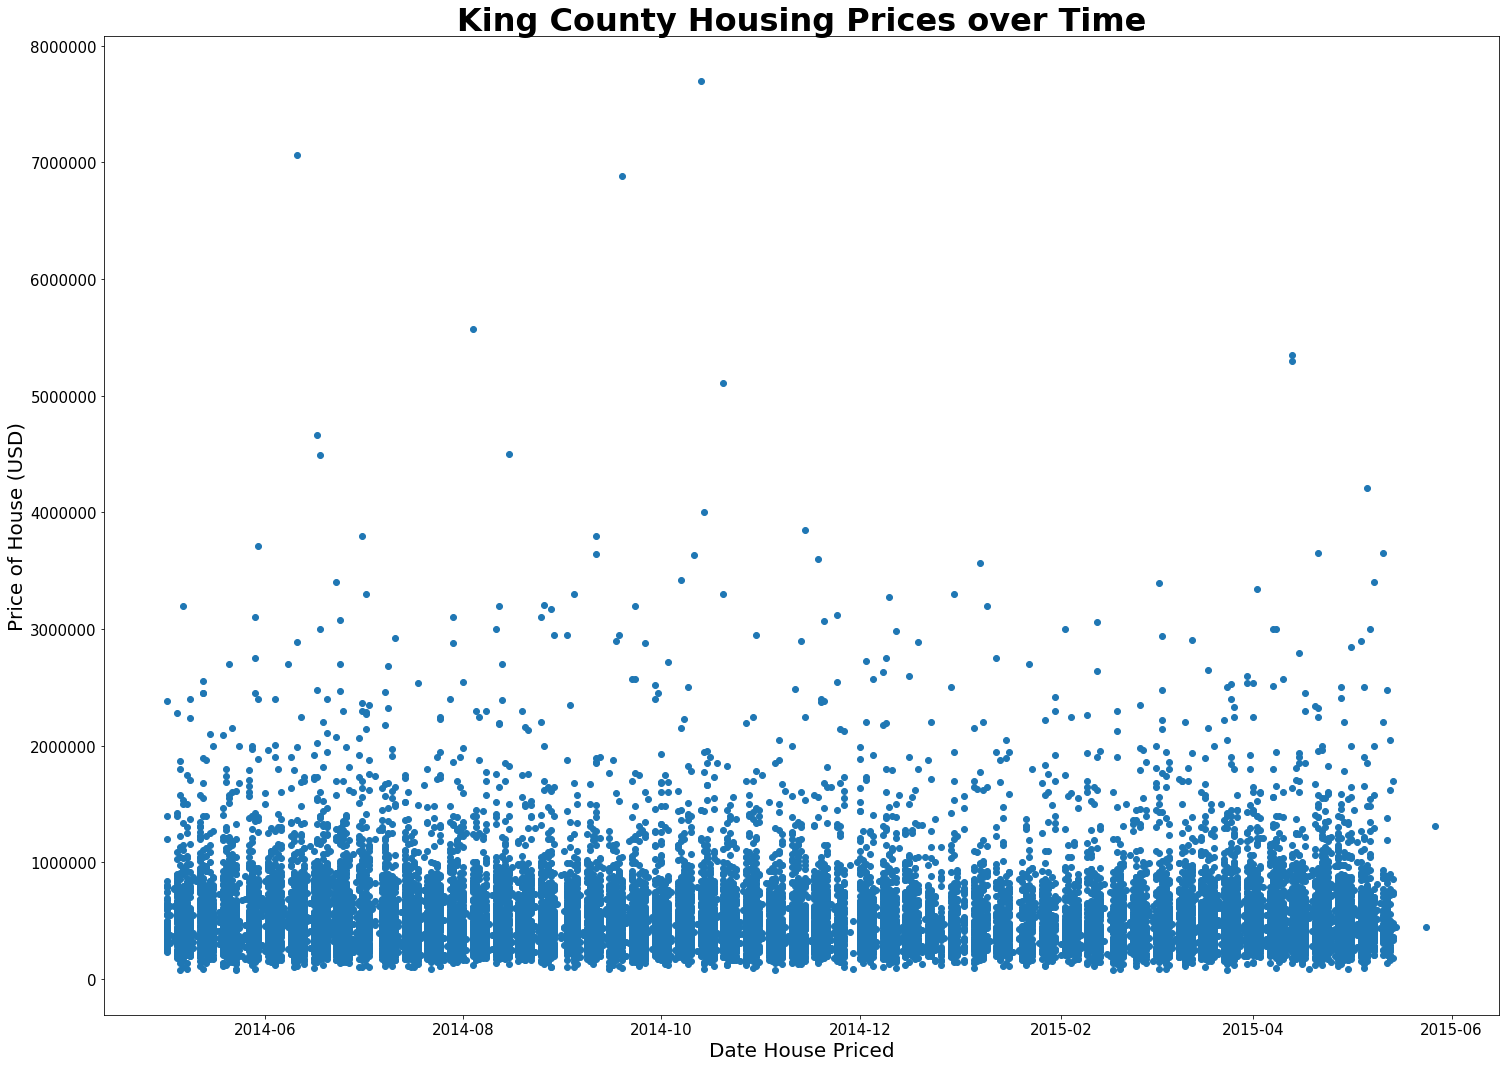

In [20]:
plt.figure(figsize = (25,18))
plt.xticks(fontsize = 15)
plt.xlabel('Date House Priced', fontsize = 20)
plt.yticks(fontsize = 15)
plt.ylabel('Price of House (USD)',fontsize = 20)
plt.title('King County Housing Prices over Time',fontsize = 32, fontweight = 'bold')
plt.plot(king.date,king.price,'o')

In [21]:
king['price_year']=pd.DatetimeIndex(king.date).year
king = king.drop('date',axis = 1) #dropping date from features for linear regression
#Creating additional feature
king['price_builtdiff'] = king.price_year-king.yr_built
king.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_year,price_builtdiff
1148,725000.0,3,2.50,1940,4000,1.5,0,0,5,7,...,0,1906,1906,98109,47.6372,-122.352,1440,4000,2014,108
4374,221000.0,3,1.00,1250,7280,1.0,0,0,3,7,...,0,1965,1965,98001,47.3414,-122.286,1450,7350,2015,50
5621,110000.0,2,1.00,760,4746,1.0,0,0,3,5,...,0,1930,1930,98055,47.4836,-122.214,1360,7810,2014,84
6239,200000.0,3,2.00,1170,10051,1.0,0,0,4,7,...,0,1957,1957,98198,47.4229,-122.324,1440,9800,2015,58
18898,325000.0,4,2.50,1820,9161,1.0,0,0,4,7,...,600,1975,1975,98058,47.4333,-122.168,1860,7650,2014,39
17009,230000.0,5,1.00,1410,9000,1.0,0,0,5,7,...,0,1967,1967,98023,47.3054,-122.369,1200,8346,2014,47
8154,309933.0,3,1.75,1820,78408,1.0,0,0,3,6,...,600,1950,1950,98042,47.3364,-122.128,1340,78408,2015,65
13476,381000.0,3,2.00,1680,8946,1.0,0,0,3,6,...,740,1996,1996,98053,47.6379,-121.966,1550,11625,2014,18
11761,695000.0,3,2.50,4560,17622,2.0,0,0,4,9,...,760,1986,1986,98074,47.6210,-122.030,2360,15000,2014,28
8286,480000.0,4,1.75,1840,9250,1.0,0,0,4,7,...,860,1956,1956,98133,47.7080,-122.337,1520,9250,2015,59


In [22]:
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
price              21613 non-null float64
bedrooms           21613 non-null int64
bathrooms          21613 non-null float64
sqft_living        21613 non-null int64
sqft_lot           21613 non-null int64
floors             21613 non-null float64
waterfront         21613 non-null int64
view               21613 non-null int64
condition          21613 non-null int64
grade              21613 non-null int64
sqft_above         21613 non-null int64
sqft_basement      21613 non-null int64
yr_built           21613 non-null int64
yr_renovated       21613 non-null int64
zipcode            21613 non-null int64
lat                21613 non-null float64
long               21613 non-null float64
sqft_living15      21613 non-null int64
sqft_lot15         21613 non-null int64
price_year         21613 non-null int64
price_builtdiff    21613 non-null int64
dtypes: float64(5), int64(16)
memory usag

In [23]:
# Selecting price as the what we want to predict, and all other features as X
y = king.price
x = king.drop('price',axis = 1)
x.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_year,price_builtdiff
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,1973.386018,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,43.317818
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,28.806854,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,29.375493
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,-1.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1954.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,18.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,40.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,63.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,115.000000


## Import Scikit-learn libraries needed for machine learning

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 70% of houses to be used in training the algorithm, 30% in test set.
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42) 

from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() #mean normalization of the training and test sets
X_train = sc.fit_transform(X_train) #now a numpy array
X_test = sc.transform(X_test) #now a numpy array

reg = LinearRegression().fit(X_train,y_train)

In [25]:
reg.coef_ #An array of all values theta for our features in the regression algorithm

array([-3.22338319e+04,  3.08525244e+04,  2.92506105e+15,  3.85301902e+03,
        3.12072027e+03,  4.59463761e+04,  4.17231361e+04,  1.59087651e+04,
        1.11239492e+05, -2.65445675e+15, -1.40739391e+15,  1.33617498e+13,
        1.88280288e+04, -2.98153947e+04,  8.28418660e+04, -2.76579170e+04,
        1.11179505e+04, -8.91902121e+03, -2.12636985e+11,  1.33616213e+13])

In [26]:
reg.intercept_ #House price if all values theta = 0

537639.6534330706

In [27]:
y_pred = reg.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

43209607839.045


In [29]:
print(f'My housing price algorithm explains {round(reg.score(X_test,y_test),2)*100}% of the variance for the testing data')

My housing price algorithm explains 70.0% of the variance for the testing data


Text(0.5,1,'Bathrooms x Bedrooms in Each House')

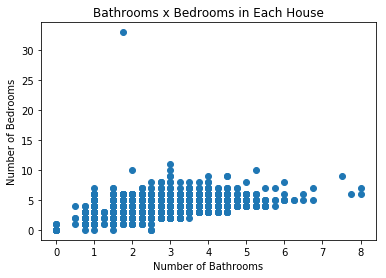

In [30]:
plt.plot(king.bathrooms,king.bedrooms,'o')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Bedrooms')
plt.title('Bathrooms x Bedrooms in Each House')

Text(0,0.5,'Difference (USD)')

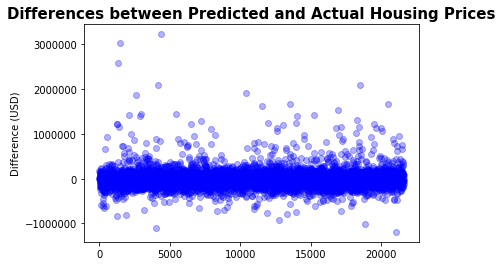

In [31]:
plt.plot((y_test-y_pred),'bo',alpha = 0.3)
plt.title('Differences between Predicted and Actual Housing Prices', fontsize = 15, fontweight = 'bold')
plt.ylabel('Difference (USD)')

In [32]:
king.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_year,price_builtdiff
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,291.509045,1971.005136,1973.386018,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,43.317818
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,442.575043,29.373411,28.806854,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,29.375493
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,1954.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,115.000000
